# 문제 1

**정답**

3

**풀이**

3. KMeans는 클러스터 개수인 k값을 지정해주어야 작동한다. 추가적으로 실전에서 KMeans 값을 알기 어렵다는 점을 해결하기 위해 엘보우 방법을 사용한다

# 문제 2

In [ ]:
from google.colab import files
uploaded = files.upload()

import pandas as pd
import io
data = pd.read_csv(io.StringIO(uploaded['CustomerDataSet.csv'].decode('utf-8')))

Saving CustomerDataSet.csv to CustomerDataSet.csv


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(data)
print(scaler.data_max_)

data_scaled = scaler.transform(data)
print(data_scaled[:5])

[  21.   50.   22.    9. 2896.]
[[0.         0.87804878 0.45454545 0.125      0.07771084]
 [0.05882353 0.80487805 0.81818182 0.5        0.92048193]
 [0.11764706 1.         0.         0.         0.06445783]
 [0.23529412 0.09756098 0.54545455 0.375      0.72228916]
 [0.29411765 0.02439024 0.31818182 0.25       0.72228916]]


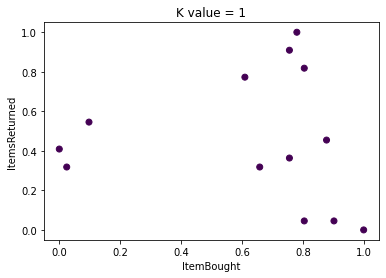

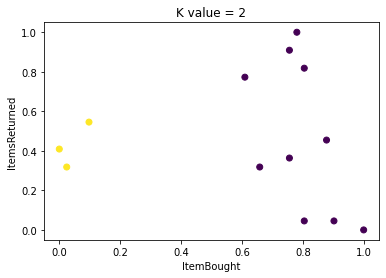

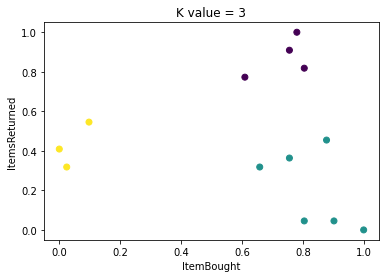

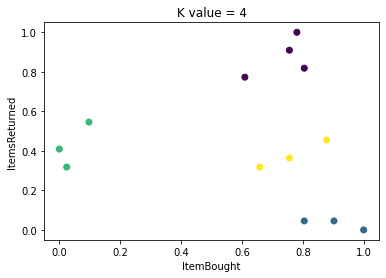

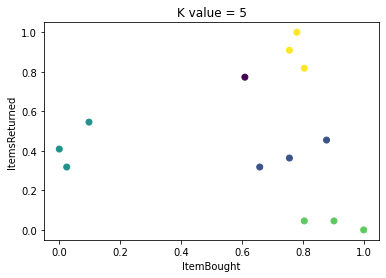

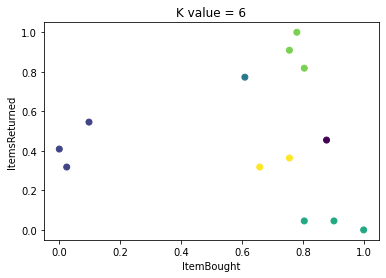

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


for i in range(1, 7):
  model = KMeans(n_clusters=i, random_state=42)
  model.fit(data_scaled[:, 1:3])
  label = model.labels_

  fig, ax = plt.subplots()
  ax.scatter(data_scaled[:, 1], data_scaled[:, 2], c=label)
  ax.set_xlabel('ItemBought')
  ax.set_ylabel('ItemsReturned')
  ax.set_title('K value = %d'%(i))

# 문제 3

**정답**

2, 4

**풀이**

1. 주성분분석에서 주성분은 일반적으로 원본 특성(feature)의 갯수 만큼 찾을 수 있다. 이 때 찾아낸 주성분을 이용하여 어떤 변수가 중요한 변수인지 판별할 수 있다.

4.   주성분(Principal Component)는 데이터에서 분산이 가장 큰 방향을 나타내는 벡터이다.

# 문제 4

In [ ]:
# 데이터 불러오기
from google.colab import drive
drive.mount('/content/gdrive')
data = pd.read_csv("/content/gdrive/My Drive/Colab Notebooks/data_file/number.csv")

# 함수 정의
def draw_data(arr, ratio=1):
  n = len(arr)

  rows = int(np.ceil(n/10))
  cols = n if rows < 2 else 10

  fig, axs = plt.subplots(rows, cols,
                          figsize=(cols*ratio, rows*ratio), squeeze=False)
  
  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n:
        axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
      axs[i, j].axis('off')

  plt.show()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


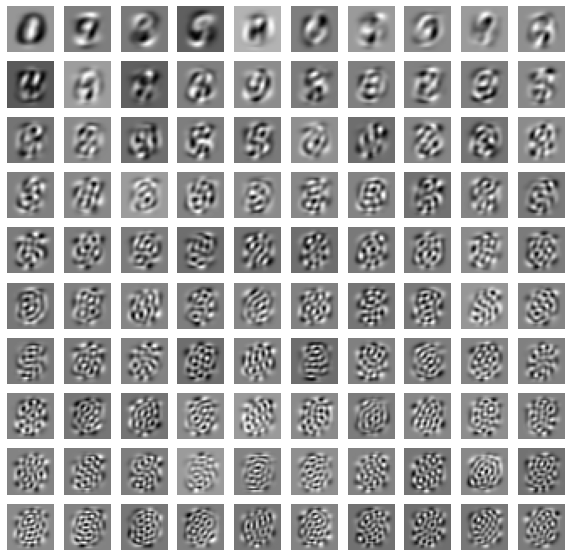

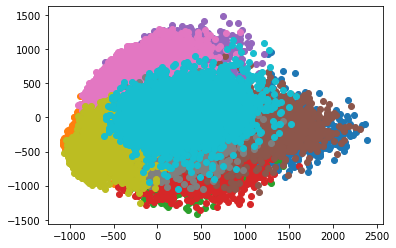

In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

data = data.to_numpy()
data_2d = data.reshape(-1, 28*28)

pca = PCA(n_components=100, random_state=42)
pca.fit(data_2d)
data_pca = pca.transform(data_2d)

draw_data(pca.components_.reshape(-1, 28, 28))


model = KMeans(n_clusters=10, random_state=42)
model.fit(data_pca)

for label in range(10):
  draw_data(data[model.labels_ == label].reshape(-1, 28, 28))
  print('\n')

for label in range(10):
  data_tmp= data_pca[model.labels_ == label]
  plt.scatter(data_tmp[:, 0], data_tmp[:, 1])
plt.show()